# Crypto Market Time-Series Analysis & Simple Backtest
- Downloaded historical Bitcoin data using `yfinance`.
- Performed exploratory data analysis (EDA). Calculated moving averages and volatility.
- Built and backtested a simple moving average crossover strategy.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
# Download BTC daily data from Jan 2021 to today
btc = yf.download('BTC-USD', start='2021-01-01', interval='1d')
btc.head()

D:\Temp\ipykernel_11128\739746242.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download('BTC-USD', start='2021-01-01', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2021-01-01,29374.152344,29600.626953,28803.585938,28994.009766,40730301359
2021-01-02,32127.267578,33155.117188,29091.181641,29376.455078,67865420765
2021-01-03,32782.023438,34608.558594,32052.316406,32129.408203,78665235202
2021-01-04,31971.914062,33440.218750,28722.755859,32810.949219,81163475344
2021-01-05,33992.429688,34437.589844,30221.187500,31977.041016,67547324782


## Data Overview

In [3]:
btc['Daily_Return'] = btc['Close'].pct_change()
btc['MA20'] = btc['Close'].rolling(window=20).mean()
btc['MA50'] = btc['Close'].rolling(window=50).mean()
btc['Volatility'] = btc['Close'].rolling(window=20).std()

## Visualizations

We plot the daily closing price along with 20-day and 50-day moving averages to observe medium-term trends and identify potential crossover points for trading signals.
=> To see how Bitcoin price moves over weeks, and to spot where the fast and slow averages cross — which traders use to decide when to buy or sell !

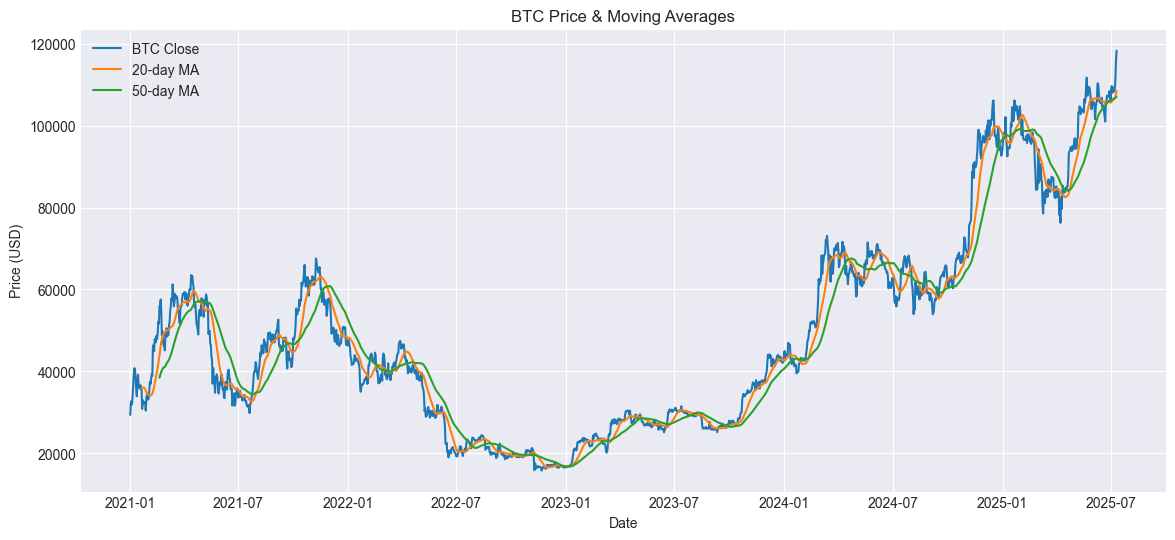

In [4]:
plt.figure(figsize=(14,6))
plt.plot(btc.index, btc['Close'], label='BTC Close')
plt.plot(btc.index, btc['MA20'], label='20-day MA')
plt.plot(btc.index, btc['MA50'], label='50-day MA')
plt.title('BTC Price & Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

We calculate the 20-day rolling standard deviation to visualize how volatile the Bitcoin market has been over time.

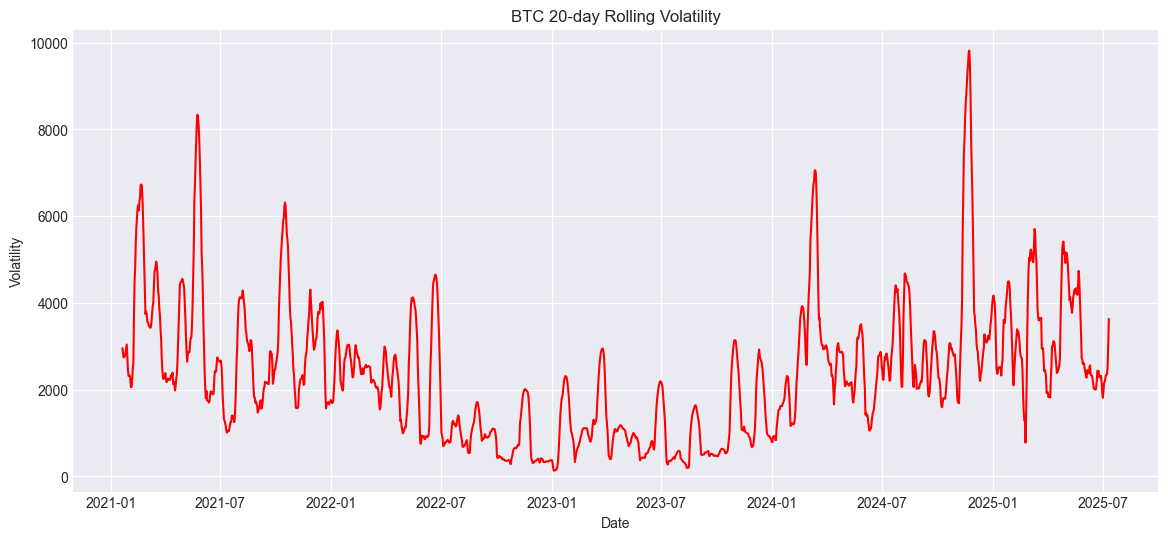

In [5]:
plt.figure(figsize=(14,6))
plt.plot(btc.index, btc['Volatility'], color='red')
plt.title('BTC 20-day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

Analyzing the distribution of daily returns helps understand the typical daily risk and the presence of extreme movements (fat tails).

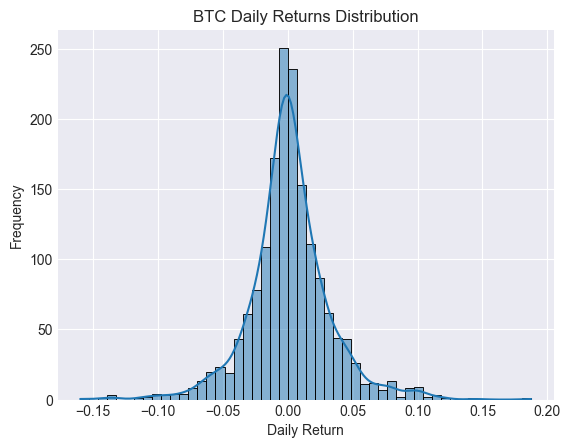

In [6]:
sns.histplot(btc['Daily_Return'].dropna(), bins=50, kde=True)
plt.title('BTC Daily Returns Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

## Backtest: Moving Average Crossover Strategy

Buy if 20-day MA > 50-day MA; sell if 20-day MA < 50-day MA.
  
- Buy when the 20-day moving average is above the 50-day MA  
- Sell (short) when it is below

We then compute strategy returns and compare them to the market performance.

In [7]:
btc['Signal'] = 0
btc.loc[btc['MA20'] > btc['MA50'], 'Signal'] = 1
btc.loc[btc['MA20'] <= btc['MA50'], 'Signal'] = -1

# Shift signal to next day to avoid lookahead bias
btc['Strategy_Return'] = btc['Daily_Return'] * btc['Signal'].shift(1)

# Calculate cumulative returns
btc['Cumulative_Strategy'] = (1 + btc['Strategy_Return']).cumprod()
btc['Cumulative_Market'] = (1 + btc['Daily_Return']).cumprod()

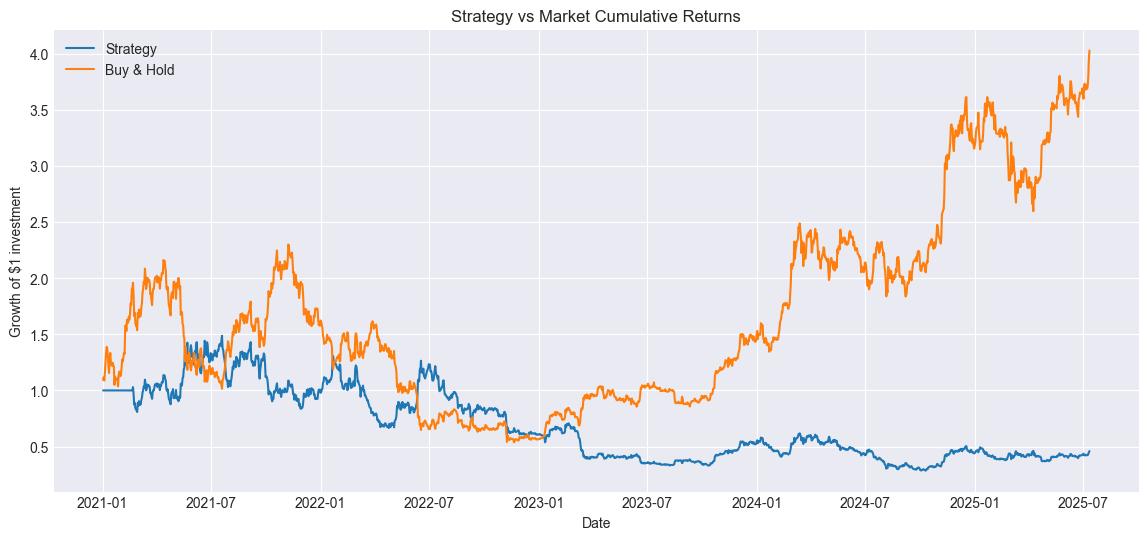

In [8]:
plt.figure(figsize=(14,6))
plt.plot(btc.index, btc['Cumulative_Strategy'], label='Strategy')
plt.plot(btc.index, btc['Cumulative_Market'], label='Buy & Hold')
plt.title('Strategy vs Market Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Growth of $1 investment')
plt.legend()
plt.show()

## Strategy vs Market Performance

The plot shows how the strategy performs compared to simply buying and holding Bitcoin over the same period.